<a href="https://www.kaggle.com/code/punitmalik04/supermarket-sales-data-analysis?scriptVersionId=95068280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
 import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


supermarket_data = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')
supermarket_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [2]:

supermarket_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
#deleting  columns including invoice ID, date, time and gross margin percentage
supermarket_data = supermarket_data.drop(['Invoice ID','Time','Date','gross margin percentage','Tax 5%'],axis =1)
supermarket_data.rename(columns={'Product line':'Product_line', 'gross income':'gross_income'}, inplace=True)

In [4]:
#comparing the performance of three branches from the ratings given to each of them.
branch_data = supermarket_data.groupby('Branch')
branch_A = branch_data.get_group('A')
branch_B = branch_data.get_group('B')
branch_C = branch_data.get_group('C')

print('Calculating the mean of Ratings of three branches')

print('mean of A' , branch_A['Rating'].mean() ,
      '\nmean of B', branch_B['Rating'].mean() ,
      '\nmean of C', branch_C['Rating'].mean())
  

Calculating the mean of Ratings of three branches
mean of A 7.027058823529413 
mean of B 6.818072289156625 
mean of C 7.072865853658537


In [5]:
print('Calculating the mean of gross income of three branches')
print('mean of A' , branch_A['gross_income'].mean() ,
      '\nmean of B', branch_B['gross_income'].mean() ,
      '\nmean of C', branch_C['gross_income'].mean())

Calculating the mean of gross income of three branches
mean of A 14.874001470588235 
mean of B 15.232024096385542 
mean of C 16.05236737804878


In [6]:
profitability = (supermarket_data['gross_income'].mean()/supermarket_data['cogs'].mean())*100

profitability

5.0

In [7]:
profit_A = (branch_A['gross_income'].mean()/branch_A['cogs'].mean())*100
profit_B = (branch_B['gross_income'].mean()/branch_B['cogs'].mean())*100
profit_C = (branch_C['gross_income'].mean()/branch_C['cogs'].mean())*100

print('\n ',profit_A,'\n ',profit_B,'\n ',profit_C)


  5.0 
  5.0 
  5.0


In [8]:
product_type= supermarket_data['Product_line'].unique()
product_type

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

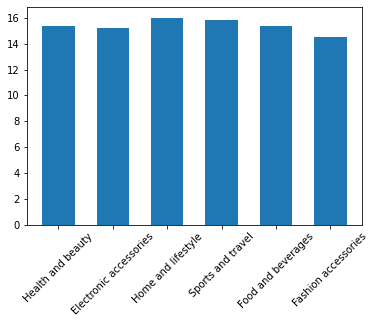

In [9]:
#comparing income generated by different category of product line. 
def profit(column1,column2,category):  #created a function which takes three arguments i.e. two columns and one category from column 1 within the first column.

    df_data = pd.DataFrame()  #empty dataframe

    for i in category:
            product_sum = supermarket_data.groupby(column1).get_group(i)
            series_data = pd.Series(product_sum[column2].mean())
            df_data = df_data.append(series_data,ignore_index=True)

    plt.bar(category,df_data[0],width = 0.6)
    plt.xticks(rotation=45)
    plt.show()
    
profit('Product_line','gross_income',product_type)

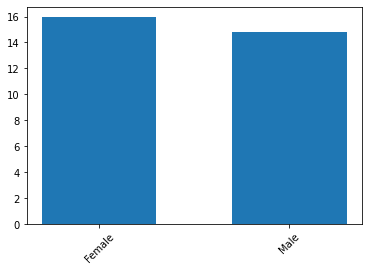

In [10]:
profit(supermarket_data['Gender'],'gross_income',supermarket_data['Gender'].unique())

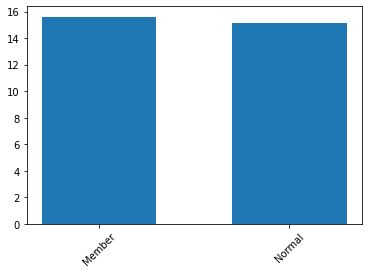

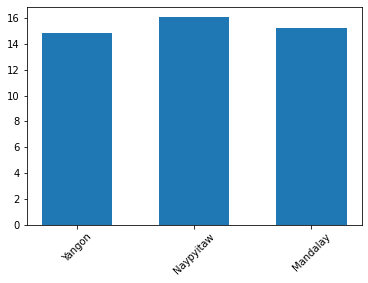

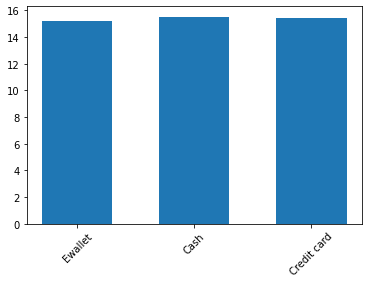

In [11]:
profit(supermarket_data['Customer type'],'gross_income',supermarket_data['Customer type'].unique())
profit(supermarket_data['City'],'gross_income',supermarket_data['City'].unique())
profit(supermarket_data['Payment'],'gross_income',supermarket_data['Payment'].unique())

In [12]:
supermarket_data.describe()

,Unit price,Quantity,Total,cogs,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000
